# Lab 5: DT and RF

This lab is designed to challenge you to apply existing knowledge from previous lectures into real-world practices. We will be writing codes to practice decision trees and random forest algorithms. You might encounter some errors early, so please don't start late!


### Instructions
1. This lab uses the github dataset https://raw.githubusercontent.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/master/diabetes_dataset.csv

2. There are `NO` restrictions on library use. Feel free to simplify your code as you wish.

3. Make sure all plots, outputs and intermediate results are visible in the final pdf that you submit.

### Submission guide
Save a copy as UniqueID_Lab5.ipynb and submit the pdf file to Canvas, or a link to the file is ok. Make sure it is shared.

# Q1: Decision Trees (15 pts)
The dataset `diabetes_dataset.csv` is from the link https://raw.githubusercontent.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/master/diabetes_dataset.csv

In [29]:
# import necessary libraries
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

### Dataset Preparation

In [30]:
# loading the dataset into a pandas dataframe
# show first 5 rows of the dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/master/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# print the distinct labels (Outcome)
print(df.Outcome.unique())
# print the size of the dataset
print(df.shape)

[1 0]
(768, 9)


### Decision Tree

In [32]:
# Make the train-test split in 80:20 ratio
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Train a DT model using DecisionTreeClassifier() from sklearn
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict the class for the test dataset
y_pred = dt_model.predict(X_test)

In [34]:
# Print the accuracy of the classification
score = accuracy_score(y_test, y_pred)
print(score)

0.7922077922077922


### Visualization

In [35]:
# Train again with max_depth of 3
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

# Predict the class for the test dataset
model.predict(X_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [36]:
# Print the accuracy of the classification
score = accuracy_score(y_test, y_pred)
print(score)

0.7922077922077922


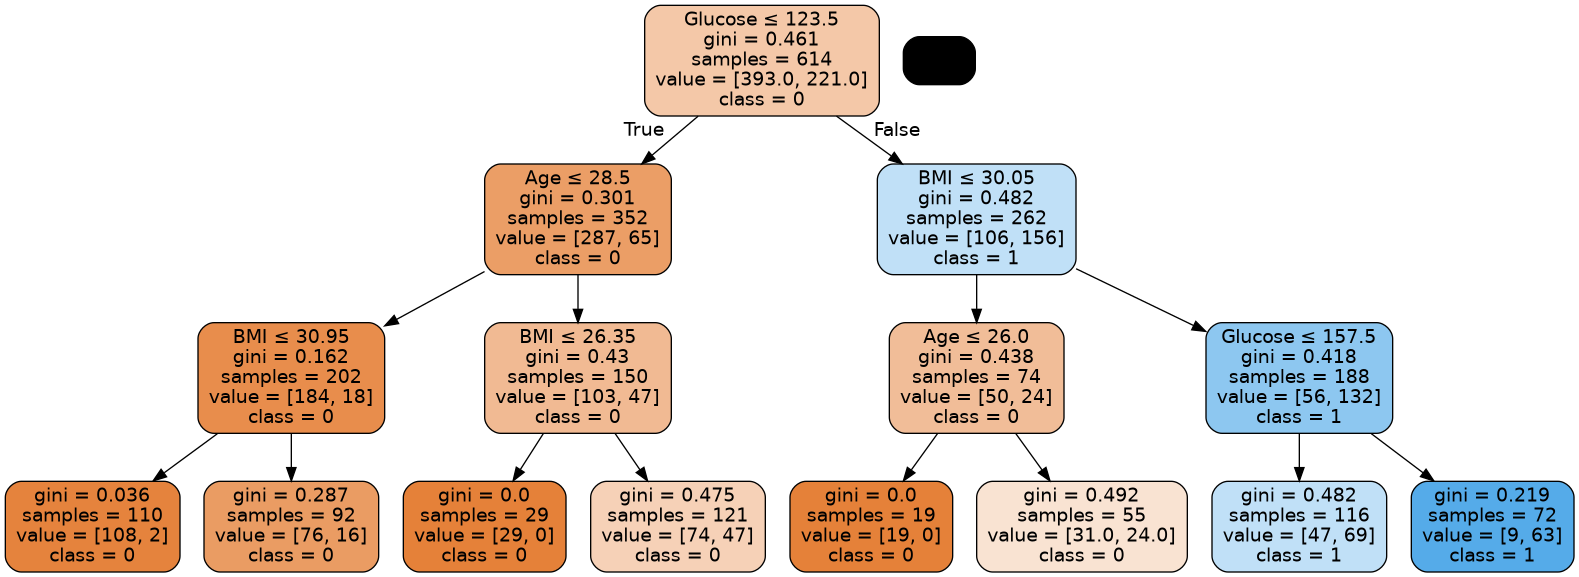

In [37]:
# Code below generates a graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Feature column names
feature_cols = df.columns.tolist()
feature_cols.remove('Outcome')

# Generating tree
dot_data = StringIO()
export_graphviz(model,
                out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisionTree.png')
Image(graph.create_png())

# Q2: Random Forest (15 pts)
Use the same dataset to train a Random Forest Model.

In [38]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier

### Train RF

In [39]:
# Train an RF model using RandomForestClassifier() from sklearn
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predict the class for the test dataset
y_pred = rf_classifier.predict(X_test)

In [40]:
# Print the accuracy of the classification
print(accuracy_score(y_test, y_pred))

# Did the accuracy increase?
print("Yes, the accuracy increased from 74% to 78%.")

0.7857142857142857
Yes, the accuracy increased from 74% to 78%.


### Visualization

In [41]:
# Train again with max_depth of 3
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
rf_classifier.fit(X_train, y_train)

# Predict the class for the test dataset
y_pred = rf_classifier.predict(X_test)

# Print the accuracy of the classification
score = accuracy_score(y_test, y_pred)
print(score)

0.7987012987012987


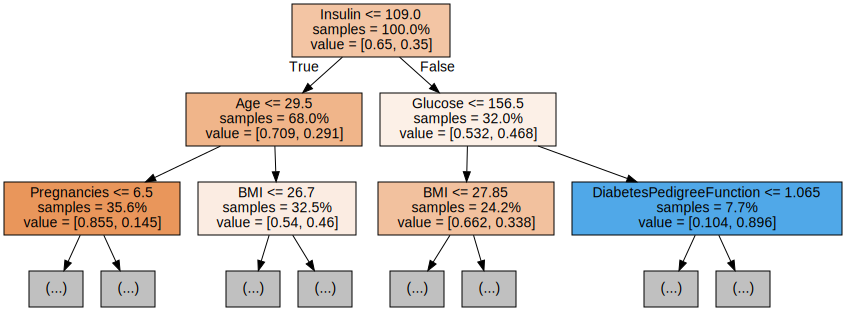

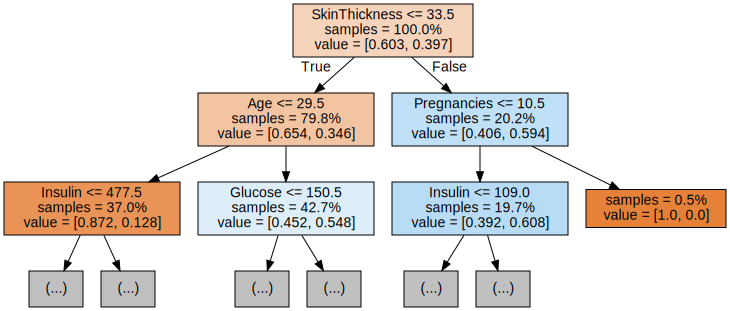

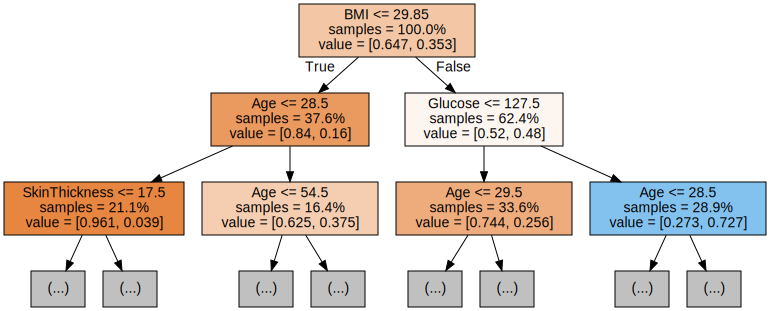

In [42]:
# Drawing three decision trees
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_cols,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)